<a href="https://colab.research.google.com/github/ndawinata/googleCO/blob/master/Prediksi_Saham_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [213]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import datetime
import math
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [214]:
start = datetime.datetime(2018,1,1)
end = datetime.datetime(2020,9,24)

In [215]:
df = web.DataReader('SRIL.JK', 'yahoo', start=start, end=end)

In [216]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-01,380.0,380.0,380.0,380.0,0.0,362.486145
2018-01-02,378.0,372.0,376.0,372.0,40666000.0,354.854889
2018-01-03,374.0,366.0,372.0,366.0,77396300.0,349.131409
2018-01-04,374.0,364.0,364.0,368.0,220484400.0,351.039246
2018-01-05,372.0,368.0,370.0,370.0,28005200.0,352.947052


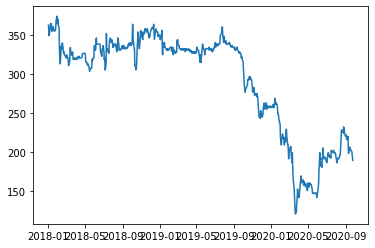

In [217]:
plt.plot(df['Adj Close'])

## Fitur Enginering

In [218]:
dfreg = df.loc[:,['Adj Close', 'Volume']]

In [219]:
dfreg.head()

,Adj Close,Volume
Date,,
2018-01-01,362.486145,0.0
2018-01-02,354.854889,40666000.0
2018-01-03,349.131409,77396300.0
2018-01-04,351.039246,220484400.0
2018-01-05,352.947052,28005200.0


In [220]:
dfreg['HL_PCT'] = (df['High'] - df['Low']) / df['Close'] * 100
dfreg['PCT_Change'] = (df['Close'] - df['Open']) / df['Open'] * 100
dfreg.head()

,Adj Close,Volume,HL_PCT,PCT_Change
Date,,,,
2018-01-01,362.486145,0.0,0.000000,0.000000
2018-01-02,354.854889,40666000.0,1.612903,-1.063830
2018-01-03,349.131409,77396300.0,2.185792,-1.612903
2018-01-04,351.039246,220484400.0,2.717391,1.098901
2018-01-05,352.947052,28005200.0,1.081081,0.000000


In [221]:
dfreg = dfreg.dropna()

In [222]:
forecast_out = 7
# forecast 7 hari

In [223]:
dfreg['label'] = dfreg['Adj Close'].shift(-forecast_out)
# geser dfreg 3 baris
dfreg.head(8)

,Adj Close,Volume,HL_PCT,PCT_Change,label
Date,,,,,
2018-01-01,362.486145,0.0,0.000000,0.000000,364.393951
2018-01-02,354.854889,40666000.0,1.612903,-1.063830,364.393951
2018-01-03,349.131409,77396300.0,2.185792,-1.612903,354.854889
2018-01-04,351.039246,220484400.0,2.717391,1.098901,354.854889
2018-01-05,352.947052,28005200.0,1.081081,0.000000,356.762665
2018-01-08,364.393951,122456900.0,2.617801,2.688172,360.578339
2018-01-09,358.670502,39375300.0,2.127660,-1.570681,356.762665
2018-01-10,364.393951,442801300.0,4.188482,1.595745,356.762665


In [224]:
X = np.array(dfreg.drop(['label'],1))

In [225]:
X = preprocessing.scale(X)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


In [226]:
X_lately = X[-forecast_out:]
X = X[:-forecast_out]

In [227]:
y = np.array(dfreg['label'])
y = y[:-forecast_out]

In [228]:
X_train = X
y_train = y

In [229]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.2, random_state = 43)

In [230]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [231]:
clfreg = LinearRegression()
clfreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [232]:
# Quadratic Regression 2
clfpoly2 = make_pipeline(PolynomialFeatures(2), Ridge())
clfpoly2.fit(X_train, y_train)

# Quadratic Regression 3
clfpoly3 = make_pipeline(PolynomialFeatures(3), Ridge())
clfpoly3.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('ridge',
                 Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=None,
                       solver='auto', tol=0.001))],
         verbose=False)

In [233]:
clfknn = KNeighborsRegressor(n_neighbors=1)
clfknn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                    weights='uniform')

In [234]:
clfreg.score(X_test, y_test)

0.9603463771435631

In [235]:
clf = clfknn
# clfknn dapat diganti clfreg atau clfknn tergantung kebutuhan pake regresi, knn, atau clfpoly2/clfpoly3

In [236]:
X_lately

array([[-1.38004911, -0.36402094, -0.36600028,  0.11348271],
       [-1.41112262, -0.34613081,  0.03825021, -0.33428474],
       [-1.41112262, -0.36478865, -0.75470268,  0.11348271],
       [-1.44219613, -0.3374666 , -0.1500761 , -0.33871808],
       [-1.4888064 , -0.35145277,  0.88151737, -0.57160149],
       [-1.55095342, -0.35014436,  0.71616331, -1.03985769],
       [-1.61310044, -0.34123861,  0.96755744, -0.83309304]])

In [237]:
clf.predict(X_lately)

array([196.        , 172.14355469, 192.        , 193.        ,
       192.04455566, 189.        , 202.        ])

In [238]:
forecast_set = clf.predict(X_lately)
dfreg['Forecast'] = np.nan

In [239]:
last_date = dfreg.iloc[-1].name
last_unix = last_date
next_unix = last_unix + datetime.timedelta(days=1)

In [240]:
for i in forecast_set:
  next_date = next_unix
  next_unix += datetime.timedelta(days=1)
  dfreg.loc[next_date] = [np.nan for _ in range(len(dfreg.columns)-1)] + [i]

In [241]:
dfreg.tail(10)

,Adj Close,Volume,HL_PCT,PCT_Change,label,Forecast
Date,,,,,,
2020-09-22,197.0,13520000.0,5.076142,-1.500000,NaN,NaN
2020-09-23,193.0,14005900.0,4.663212,-2.525253,NaN,NaN
2020-09-24,189.0,17313200.0,5.291005,-2.072539,NaN,NaN
2020-09-25,NaN,NaN,NaN,NaN,NaN,196.000000
2020-09-26,NaN,NaN,NaN,NaN,NaN,172.143555
2020-09-27,NaN,NaN,NaN,NaN,NaN,192.000000
2020-09-28,NaN,NaN,NaN,NaN,NaN,193.000000
2020-09-29,NaN,NaN,NaN,NaN,NaN,192.044556
2020-09-30,NaN,NaN,NaN,NaN,NaN,189.000000


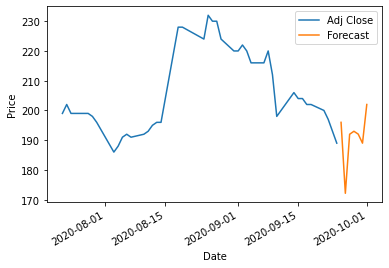

In [242]:
dfreg['Adj Close'].tail(50).plot()
dfreg['Forecast'].tail(50).plot()
plt.legend(loc=1)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()